# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [4]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

In [5]:
reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

# Run Light Curve Fits
___
## Individual SNe
First test

In [6]:
snname = "SN2006aj"
pcc.coco.run_LCfit(snname)

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


/Users/berto/Code/verbose-enigma/pycoco/utils.py:207: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


Then run

In [7]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat']
Fit complete


In [8]:
pcc.coco.run_LCfit(

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


/Users/berto/Code/verbose-enigma/pycoco/utils.py:207: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


<IPython.core.display.Javascript object>


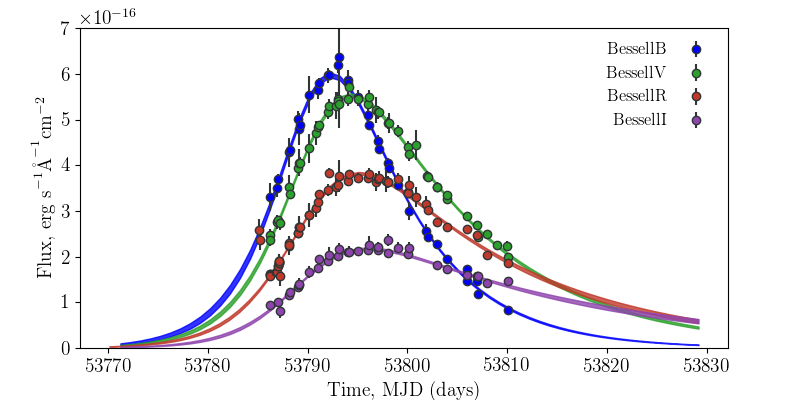

In [9]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [10]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

array(['Bazin09', 'Firth17Complex', 'Karpenka12', 'Karpenka12Afterglow',
       'Kessler10', 'LinearMangle', 'SpecMangle'],
      dtype='<U19')

In [11]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

current list.txt is up to date. re run with force = True to force.
running with Karpenka12
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat', '-m', 'Karpenka12']
Fit complete


<IPython.core.display.Javascript object>


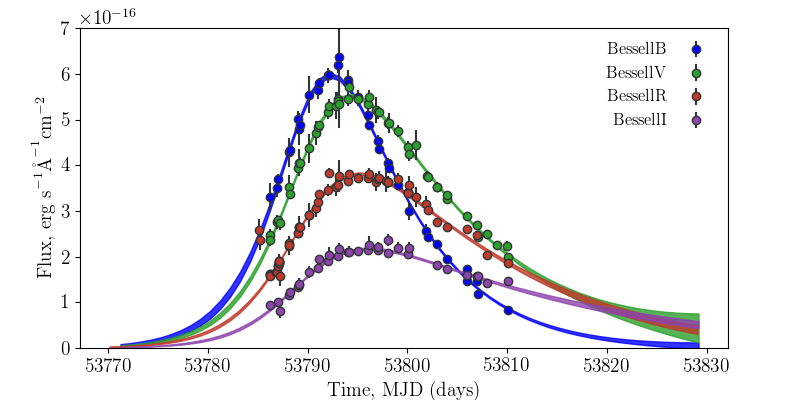

In [12]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [13]:
pcc.coco.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

Reading  /Users/berto/Code/CoCo/examples/lc.list
/Users/berto/Code/CoCo/data/../data/lc/SN1993J.dat
/Users/berto/Code/CoCo/data/../data/lc/SN1994I.dat
/Users/berto/Code/CoCo/data/../data/lc/SN1996cb.dat
/Users/berto/Code/CoCo/data/../data/lc/SN1998bw.dat
/Users/berto/Code/CoCo/data/../data/lc/SN1999dn.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2002ap.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2003jd.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2004aw.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2005bf.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2005hg.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2006aj.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2007C.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2007Y.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2007gr.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2007uy.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2008D.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2008ax.dat
/Users/berto/Code/CoCo/data/../data/lc/SN2008bo.dat
/Users/berto/Code/Co

In [14]:
reload(pcc) ## FOR DEV
reload(pcc.classes)
reload(pcc.defaults) ## FOR DEV

<module 'pycoco.defaults' from '/Users/berto/Code/verbose-enigma/pycoco/defaults.py'>

## Call Specfit
---

### individual speclists

In [15]:
pcc.coco.get_all_spec_lists()

['/Users/berto/Code/CoCo/lists/iPTF13bvn.list',
 '/Users/berto/Code/CoCo/lists/SN1993J.list',
 '/Users/berto/Code/CoCo/lists/SN1994I.list',
 '/Users/berto/Code/CoCo/lists/SN1996cb.list',
 '/Users/berto/Code/CoCo/lists/SN1998bw.list',
 '/Users/berto/Code/CoCo/lists/SN1999dn.list',
 '/Users/berto/Code/CoCo/lists/SN2002ap.list',
 '/Users/berto/Code/CoCo/lists/SN2003jd.list',
 '/Users/berto/Code/CoCo/lists/SN2004aw.list',
 '/Users/berto/Code/CoCo/lists/SN2005bf.list',
 '/Users/berto/Code/CoCo/lists/SN2005hg.list',
 '/Users/berto/Code/CoCo/lists/SN2006aj.list',
 '/Users/berto/Code/CoCo/lists/SN2007C.list',
 '/Users/berto/Code/CoCo/lists/SN2007gr.list',
 '/Users/berto/Code/CoCo/lists/SN2007uy.list',
 '/Users/berto/Code/CoCo/lists/SN2007Y.list',
 '/Users/berto/Code/CoCo/lists/SN2008ax.list',
 '/Users/berto/Code/CoCo/lists/SN2008bo.list',
 '/Users/berto/Code/CoCo/lists/SN2008D.list',
 '/Users/berto/Code/CoCo/lists/SN2009bb.list',
 '/Users/berto/Code/CoCo/lists/SN2009er.list',
 '/Users/berto/Co

In [16]:
# pcc.coco.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.coco.run_specfit(sn)

## All Speclists
___

In [ ]:
pcc.coco.specfit_all()

# Specphase

In [2]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

No Model supplied - running with default
current list.txt is up to date. re run with force = True to force.
['/Users/berto/Code/CoCo/./specphase', '/Users/berto/Code/CoCo/examples/phase.list', 'BessellV']


In [3]:
pcc.coco.run_specphase("BessellV", phase_path, model="Foo")

Model Foo not recognised.


False

In [4]:
pcc.coco.run_specphase("BessellV", phase_path, model="Bazin09")

running with Bazin09
current list.txt is up to date. re run with force = True to force.
['/Users/berto/Code/CoCo/./specphase', '/Users/berto/Code/CoCo/examples/phase.list', 'BessellV', '-m', 'Bazin09']
